<a href="https://colab.research.google.com/github/abhi-lejon/Machine-learning/blob/master/Statistical_tests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
import statsmodels.api as sm
%matplotlib inline

In [ ]:
df=pd.read_csv('/content/retail sales driver analysis.csv')

In [ ]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
df.describe() #Describes all numerical columns characteristics.

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [ ]:
print("Rows :",df.shape[0])
print("Columns :",df.shape[1])
print("\nfeatures :\n",df.columns.tolist())
print("\nMissing values : ",df.isna().any())

Rows : 8523
Columns : 12

features :
 ['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type', 'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales']

Missing values :  Item_Identifier              False
Item_Weight                   True
Item_Fat_Content             False
Item_Visibility              False
Item_Type                    False
Item_MRP                     False
Outlet_Identifier            False
Outlet_Establishment_Year    False
Outlet_Size                   True
Outlet_Location_Type         False
Outlet_Type                  False
Item_Outlet_Sales            False
dtype: bool


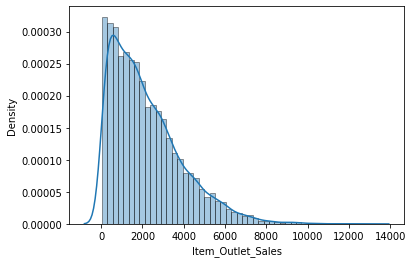

In [ ]:
sns.distplot(df['Item_Outlet_Sales'],hist=True,kde=True,hist_kws=dict(ec='k'))

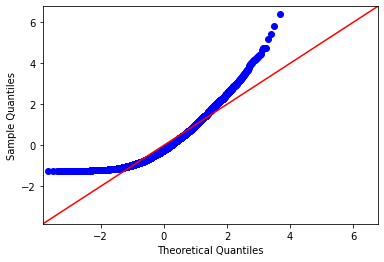

In [ ]:
plot=sm.qqplot(df['Item_Outlet_Sales'],line='45',fit=True)

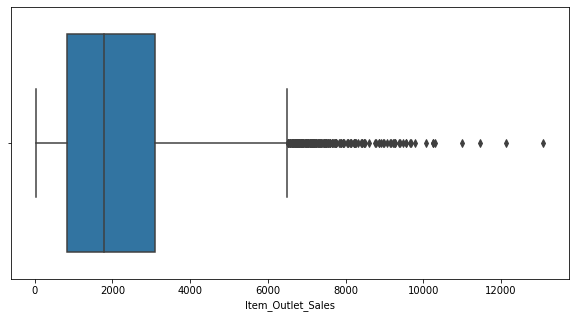

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Item_Outlet_Sales',data=df)

In [ ]:
#Lets check whether the data is coming fom normal distribution or not.
#H0= Data coming from normal dist.
#Ha= Data not coming frm a normal dist.
chi2,p=stats.normaltest(df['Item_Outlet_Sales'])
print('Chi2=%.2f,Pvalue=%.3f' %(chi2,p))
#From below p value we can conclude that data is not coming from normal distribution.

Chi2=1591.79,Pvalue=0.000


In [ ]:
stats.anderson(df['Item_Outlet_Sales'],dist='norm')
#Sample is not coming from norm dist.

AndersonResult(statistic=186.02198188367402, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.091]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

In [ ]:
#So now we got to know our data is not normal, So lets apply some transformation.
#BoxCox tells which transformation to apply
_,l=stats.boxcox(df['Item_Outlet_Sales']) #_ is the trabsformed values by boxcox and lamda value is the main to know which transformation to apply.

In [ ]:
print('lambda :',l)

lambda : 0.34647755754885007


In [ ]:
df['Item_Outlet_Sales']=np.sqrt(df['Item_Outlet_Sales'])

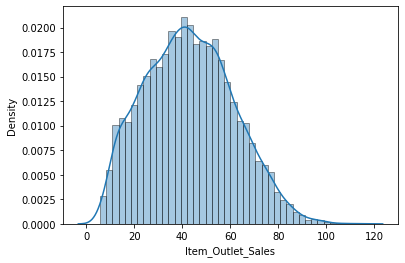

In [ ]:
sns.distplot(df['Item_Outlet_Sales'],hist=True,kde=True,hist_kws=dict(ec='k'))
#The data is now fallowing normal dist.

In [ ]:
#Lets do some statistical tests
#Ho= Population mean is 141
#Ha= Population mean is not equal to 141
#Lets do some test on it. Since we have mean and std lets check the distribution.
population_mean=np.mean(df['Item_MRP'])
population_std=np.std(df['Item_MRP'])
print(population_mean,population_std)

140.9927819781768 62.271413051361094


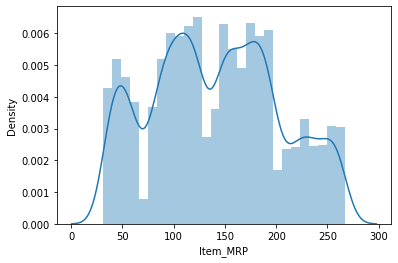

In [ ]:
sns.distplot(df['Item_MRP'],hist=True,kde=True)

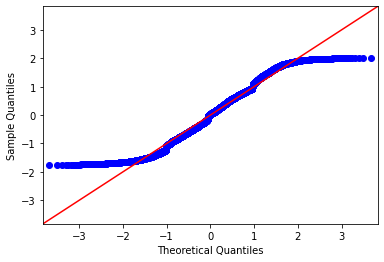

In [ ]:
plot=sm.qqplot(df['Item_MRP'],line='45',fit=True)

In [ ]:
stats.anderson(df['Item_MRP'],dist='norm')

AndersonResult(statistic=45.2853939324159, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.091]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

In [ ]:
chi2,p=stats.normaltest(df['Item_MRP'])
print('Chi2=%.2f,Pvalue=%.3f' %(chi2,p))

Chi2=1132.38,Pvalue=0.000


In [ ]:
_,l=stats.boxcox(df['Item_MRP'])

In [ ]:
print('lambda :',l)

lambda : 0.6962946430961204


In [ ]:
df['Item_MRP']=np.sqrt(df['Item_MRP'])

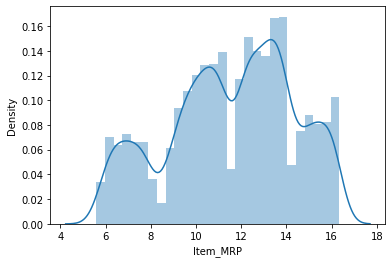

In [ ]:
sns.distplot(df['Item_MRP'],hist=True,kde=True)

In [ ]:
#If we see here the original distribution for ITEM_MRP is more clear. So lets perform on it.

In [ ]:
df['Item_MRP']=np.power(df['Item_MRP'],2)

In [ ]:
df.shape

(8523, 12)

In [ ]:
sample_item_mrp=df['Item_MRP'].sample(100)

In [ ]:
print(sample_item_mrp.shape[0])

100


In [ ]:
sample_mean=np.mean(sample_item_mrp)
print(sample_mean)

134.44675600000002


In [ ]:
Z_test=(sample_mean-population_mean)/(population_std/(np.sqrt(sample_item_mrp.shape[0])))
print(Z_test)

-1.0512088384404652


In [ ]:
#From z table, the p value for corresponding z and with alpha 0.05 is 0.1469, So we accept Ho.

In [ ]:
#Lets do t test.

In [ ]:
#Check whether the pop mean is equal to sample mean for sample size less than 30.
population_mean=np.mean(df['Item_MRP'])
print('Population_mean :',population_mean)
sample_size=df['Item_MRP'].sample(25)
sample_mean=np.mean(sample_size)
sample_std=np.std(sample_size)
print('sample_mean :',sample_mean)
print('sample_std :',sample_std)

Population_mean : 140.9927819781768
sample_mean : 122.03972000000003
sample_std : 48.65556984923309


In [ ]:
sample_size.shape[0]

25

In [ ]:
#As population std is not sepcified, assume pop std equal to sample std as point of estimate.

In [ ]:
t_dist=(sample_mean-population_mean)/(sample_std/(np.sqrt(sample_size.shape[0])))
print(t_dist)

-1.9476764979740033


In [ ]:
#As pvalue for above t and DOF 24 the p value is 0.05, we donot reject Ho.